In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
kamenolom_VELJI_ZABIO = pd.read_excel('D:\EuroMix\Velji Zabio\Dijagram opterećenja kamenolom VELJI ZABIO data organized.xlsx',sheet_name='AdvanceData',index_col=0)
kamenolom_GORAK = pd.read_excel('D:\EuroMix\Gorak\Dijagram opterećenja kamenolom GORAK.xlsx',sheet_name='AdvanceData',index_col=0)

In [3]:
kamenolom_GORAK.rename(columns={'074049497_LP1: A+01':'power [kW]'},inplace=True)
kamenolom_VELJI_ZABIO.rename(columns={'074049744_LP1: A+01':'power [kW]'},inplace=True)
# kamenolom_VELJI_ZABIO.columns

In [4]:
data_Bar = pd.DataFrame(index=kamenolom_GORAK.index)
data_Bar['GORAK_power_[kW]'] = kamenolom_GORAK['power [kW]']
data_Bar['VELJI_ZABIO_power_[kW]'] = kamenolom_VELJI_ZABIO['power [kW]']

In [5]:
data_Bar.head()

,GORAK_power_[kW],VELJI_ZABIO_power_[kW]
Time,,
2021-01-01 00:15:00,10.8,12.0
2021-01-01 00:30:00,11.4,11.0
2021-01-01 00:45:00,10.8,12.0
2021-01-01 01:00:00,11.4,12.0
2021-01-01 01:15:00,11.4,11.0


In [6]:
data_Bar.describe()

,GORAK_power_[kW],VELJI_ZABIO_power_[kW]
count,72336.000000,72336.000000
mean,118.595620,101.439145
std,121.327095,116.008958
min,0.000000,0.000000
25%,32.400000,13.000000
50%,73.800000,67.000000
75%,163.800000,128.000000
max,654.000000,750.000000


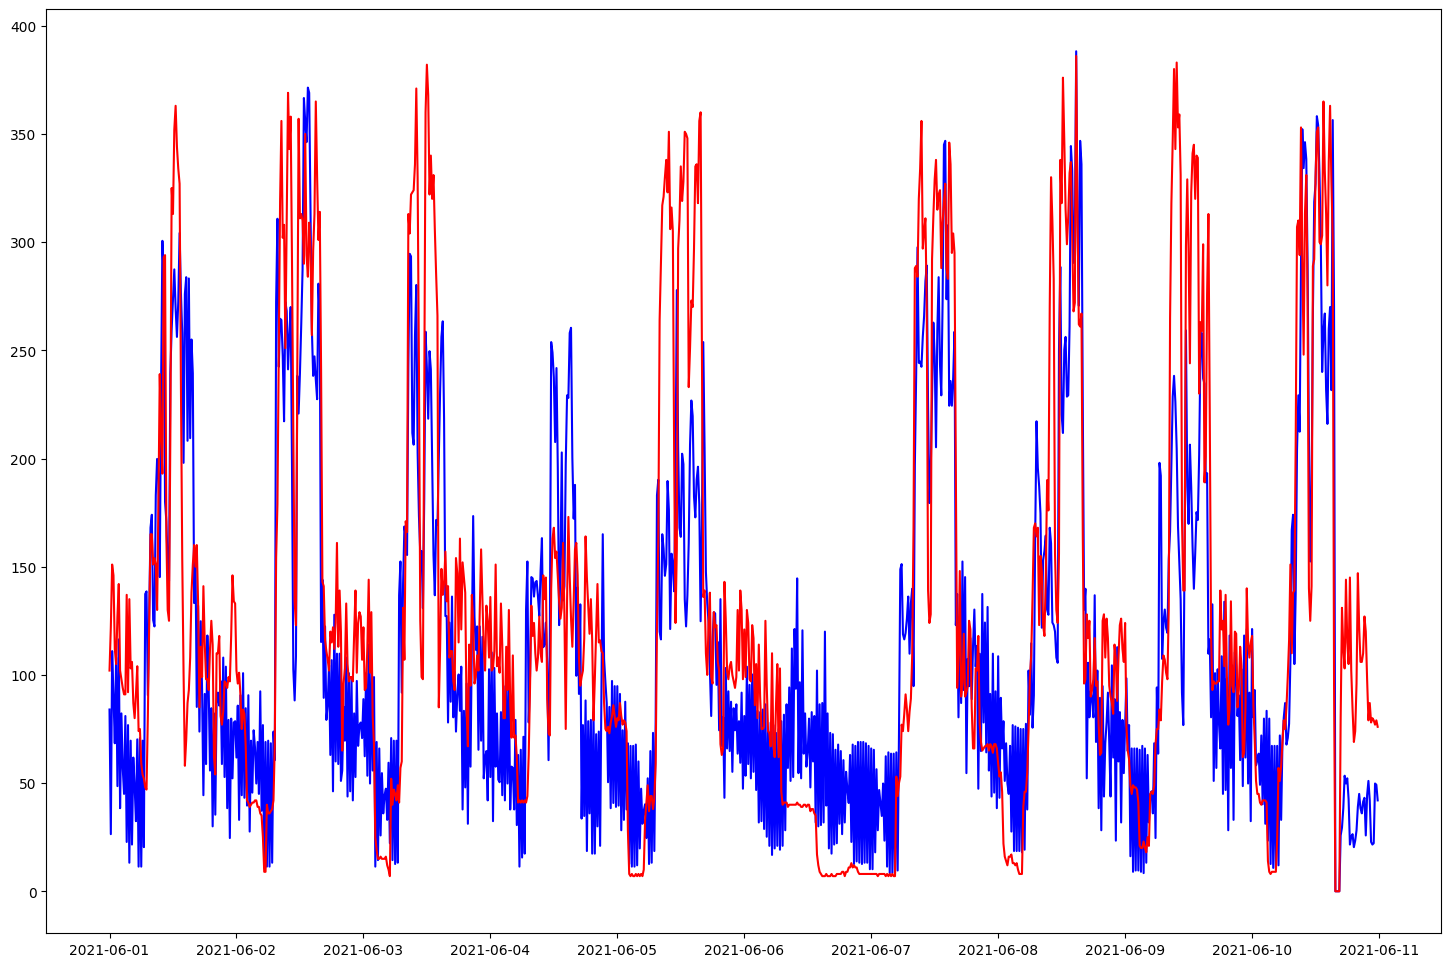

In [7]:
%matplotlib inline
import datetime
from pandas.plotting import register_matplotlib_converters
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 12)

plt.plot(data_Bar['GORAK_power_[kW]']['2021-06-01':'2021-06-10'],'b')
plt.plot(data_Bar['VELJI_ZABIO_power_[kW]']['2021-06-01':'2021-06-10'],'red')

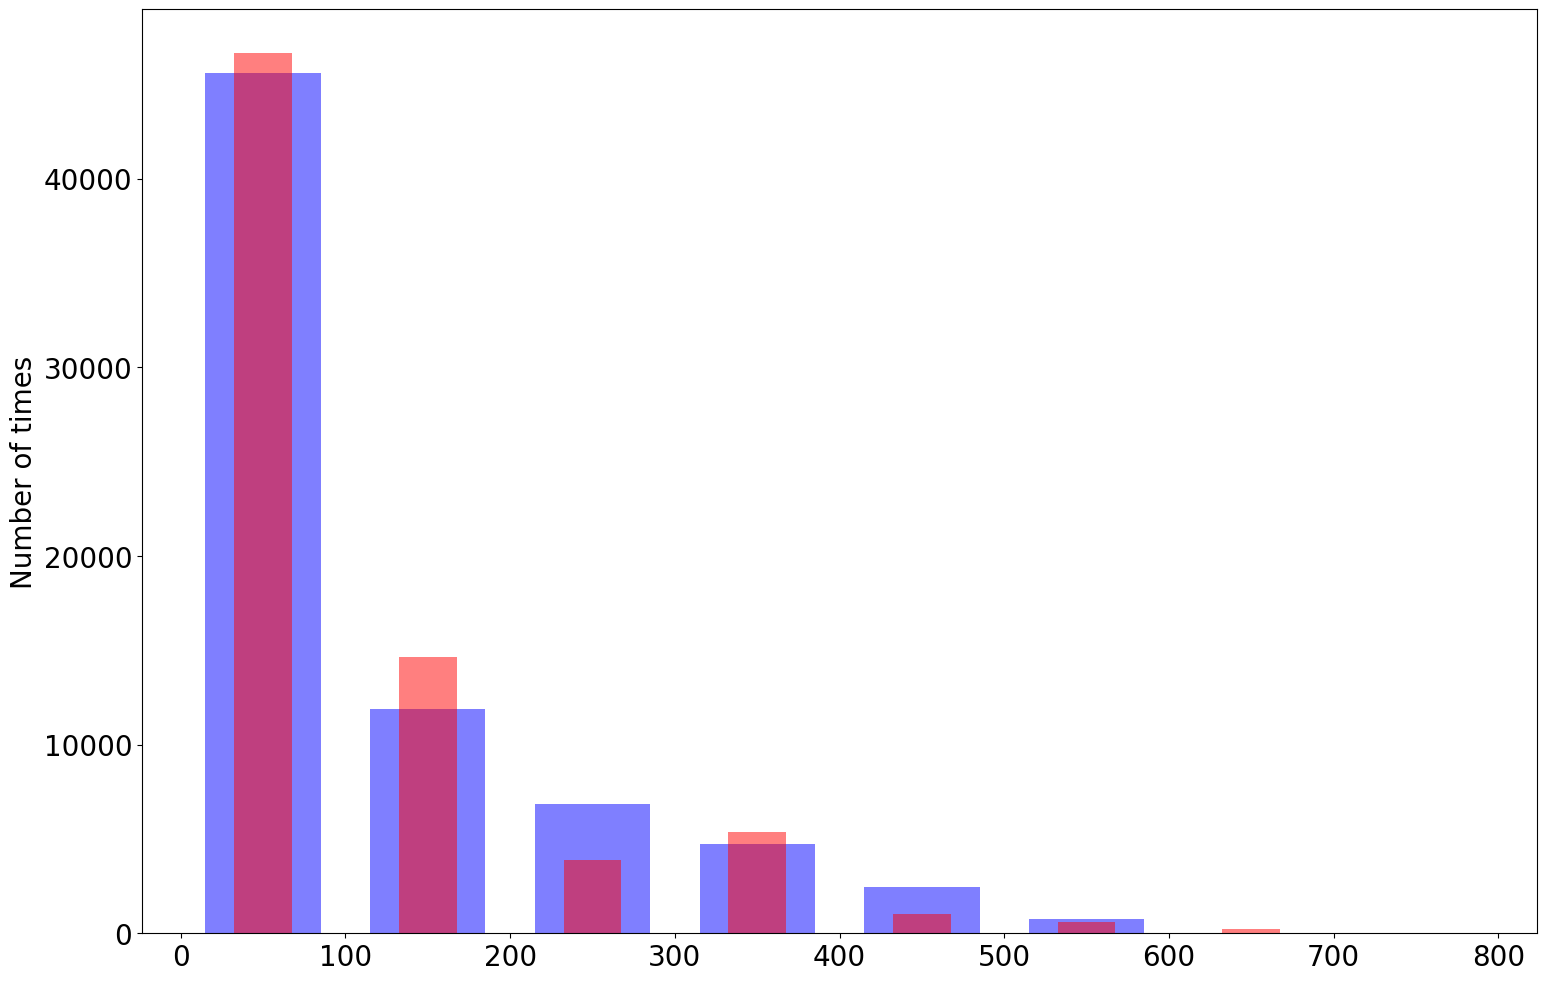

In [8]:
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 12)
ax1.hist(data_Bar['GORAK_power_[kW]'],bins=8,range=(0,800),color='blue',histtype='bar', alpha=0.5,rwidth=0.7) 
ax1.hist(data_Bar['VELJI_ZABIO_power_[kW]'],bins=8,range=(0,800),color='red',histtype='bar', alpha=0.5,rwidth=0.35) 

xp=[0,100,200,300,400,500,600,700,800]
plt.xticks(xp)
#plt.xticks(xp, ['1','2','3','4'])
plt.ylabel('Number of times',size=20)
ax1.tick_params(axis='both', labelsize=20)

In [9]:
nbins=8

count, binEdges=np.histogram(data_Bar['GORAK_power_[kW]'],bins=8,range=(0,800))
counts = pd.DataFrame()
counts['GORAK'] = count
count, binEdges=np.histogram(data_Bar['VELJI_ZABIO_power_[kW]'],bins=8,range=(0,800))
counts['VELJI_ZABIO'] = count

In [10]:
counts

,GORAK,VELJI_ZABIO
0,45590,46637
1,11901,14641
2,6859,3872
3,4756,5354
4,2478,996
5,741,621
6,11,206
7,0,9


example worst day

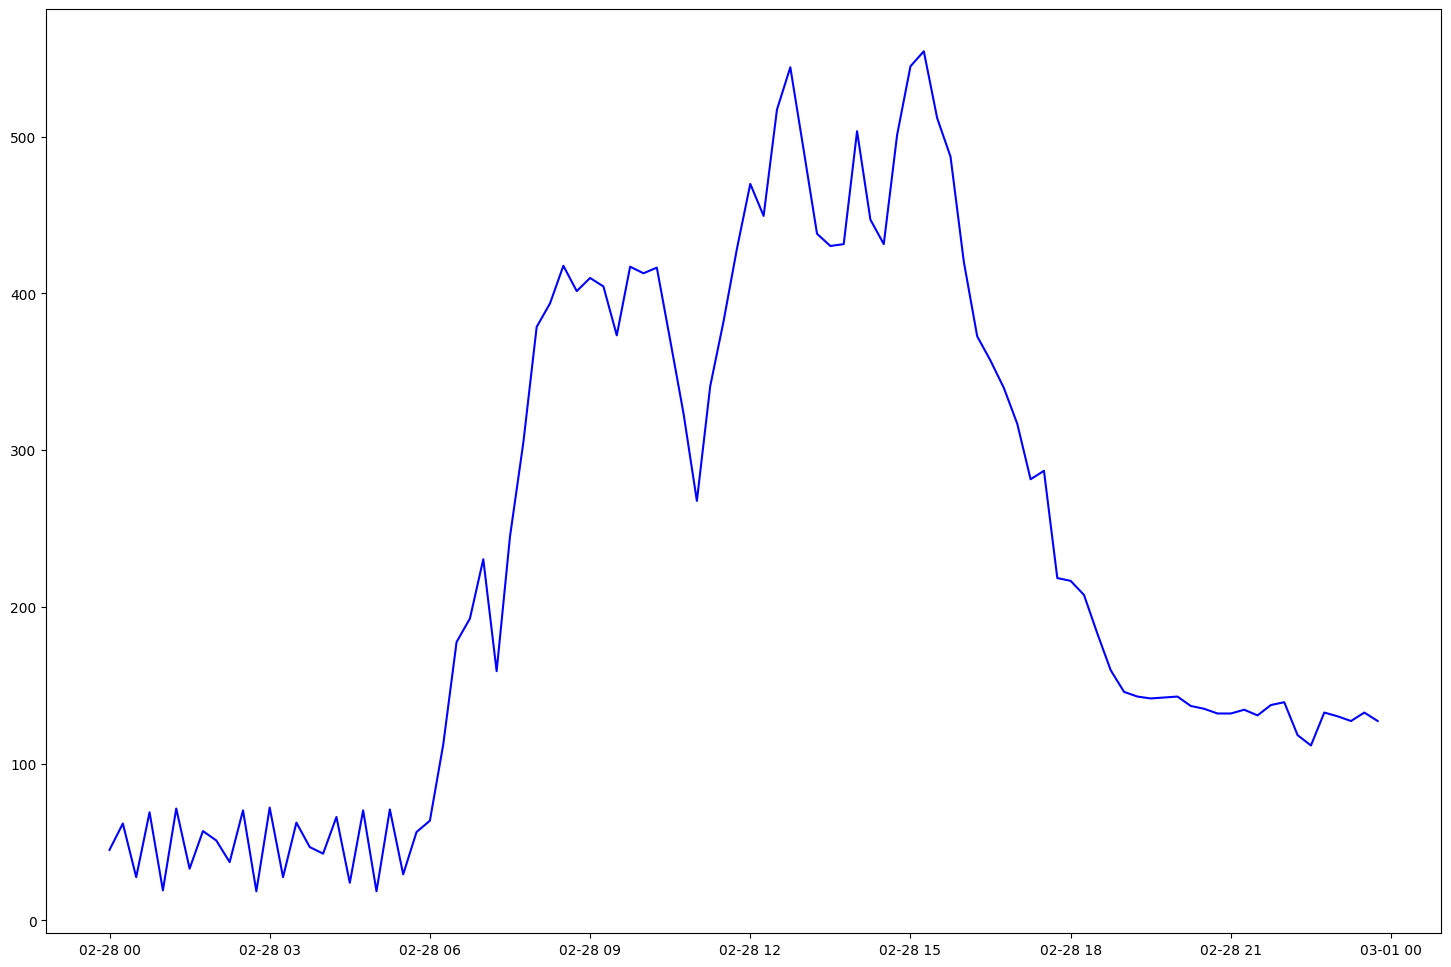

In [11]:
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 12)

plt.plot(data_Bar['GORAK_power_[kW]']['2022-02-28'],'b')

In [71]:
# df_Euromix = pd.DataFrame(index=pd.date_range(start='01/01/2021 00:15', end='24/01/2023 12:00', freq='15MIN'))
# df_Euromix['GORAK_power_[kW]'] = data_Bar['GORAK_power_[kW]'].values
# df_Euromix['VELJI_ZABIO_power_[kW]'] = data_Bar['VELJI_ZABIO_power_[kW]'].values
# df_Euromix.head()

In [72]:
df_Euromix_limited_data['working_hours'] = 0 
df_Euromix_limited_data.loc[(df_Euromix_limited_data.index.hour>6), 'working_hours'] = df_Euromix_limited_data['GORAK_power_[kW]']/1e3
df_Euromix_limited_data.loc[(df_Euromix_limited_data.index.hour>6), 'working_hours'] = df_Euromix_limited_data['VELJI_ZABIO_power_[kW]']/1e3
df_Euromix_limited_data.loc[(df_Euromix_limited_data.index.hour>17), 'working_hours'] = 0

df_working_hour_split=df_Euromix_limited_data.between_time('7:00', '16:00')
df_working_hour_split.head()

,GORAK_power_[kW],VELJI_ZABIO_power_[kW],working_hours
2022-01-01 07:00:00,9.0,8.0,0.008
2022-01-01 07:15:00,8.4,7.0,0.007
2022-01-01 07:30:00,6.0,7.0,0.007
2022-01-01 07:45:00,6.6,6.0,0.006
2022-01-01 08:00:00,6.6,7.0,0.007


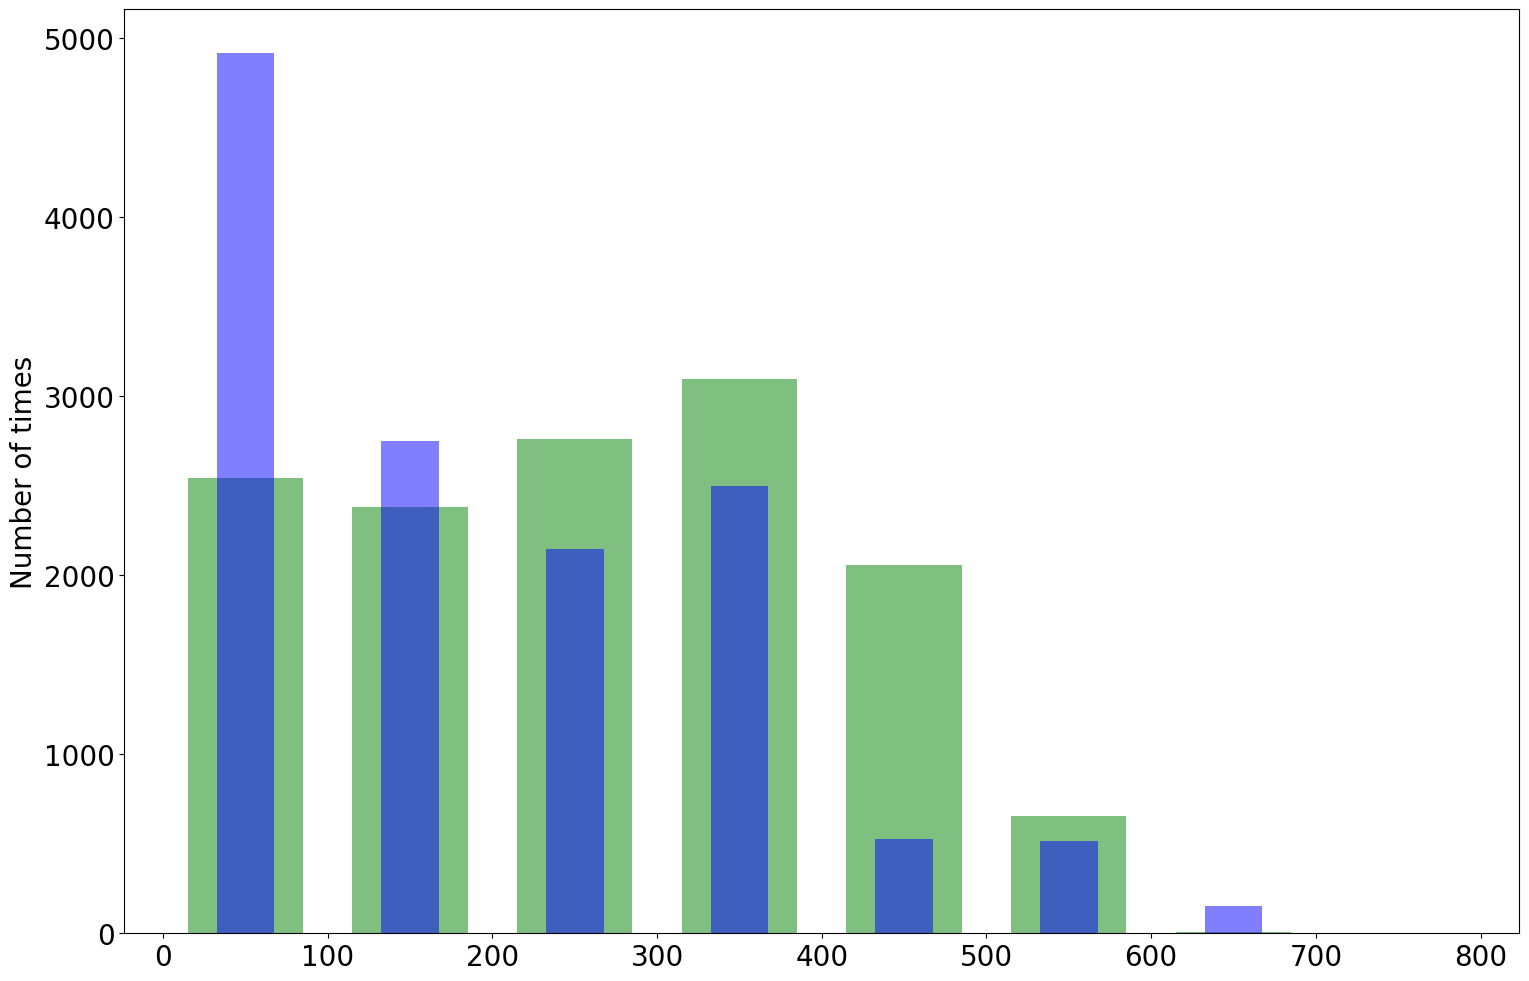

In [73]:
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(18, 12)
ax1.hist(df_working_hour_split['GORAK_power_[kW]'],bins=8,range=(0,800),color='green',histtype='bar', alpha=0.5,rwidth=0.7) 
ax1.hist(df_working_hour_split['VELJI_ZABIO_power_[kW]'],bins=8,range=(0,800),color='blue',histtype='bar', alpha=0.5,rwidth=0.35) 
xp=[0,100,200,300,400,500,600,700,800]
plt.xticks(xp)
plt.ylabel('Number of times',size=20)
ax1.tick_params(axis='both', labelsize=20)

In [74]:
print(df_working_hour_split.describe())

       GORAK_power_[kW]  VELJI_ZABIO_power_[kW]  working_hours
count      13505.000000            13505.000000   13505.000000
mean         261.586183              194.371640       0.194372
std          148.531984              153.191212       0.153191
min            0.000000                0.000000       0.000000
25%          139.200000               64.000000       0.064000
50%          265.800000              151.000000       0.151000
75%          377.400000              308.000000       0.308000
max          654.000000              722.000000       0.722000


In [98]:
monthly_capacities_VELJI=np.zeros(13); average_capacities_VELJI=np.zeros(13); difference_VELJI=np.zeros(13); teoretical_power_shaving_potential_VELJI= np.zeros(13)

for j in range(1,13) :
    monthly_capacities_VELJI[j] = max(df_working_hour_split[(df_working_hour_split.index.month == j)]['VELJI_ZABIO_power_[kW]'])
    average_capacities_VELJI[j] = np.mean(df_working_hour_split[(df_working_hour_split.index.month == j)]['VELJI_ZABIO_power_[kW]'])
    difference_VELJI[j]= monthly_capacities_VELJI[j] - average_capacities_VELJI[j] 
    print(j,monthly_capacities_VELJI[j],round(average_capacities_VELJI[j],2),round(average_capacities_VELJI[j]/monthly_capacities_VELJI[j],2),round(difference_VELJI[j],2))


1 461.0 190.3 0.41 270.7
2 473.0 188.87 0.4 284.13
3 473.0 227.58 0.48 245.42
4 443.0 214.56 0.48 228.44
5 402.0 159.07 0.4 242.93
6 395.0 199.34 0.5 195.66
7 384.0 152.42 0.4 231.58
8 423.0 165.93 0.39 257.07
9 388.0 127.45 0.33 260.55
10 655.0 140.41 0.21 514.59
11 704.0 308.23 0.44 395.77
12 722.0 260.09 0.36 461.91


In [99]:
capacity_cost = 7.3868 * 1.21
teoretical_power_shaving_potential_VELJI = capacity_cost * difference_VELJI
sum_for_year = 0
for j in range(1,13) :
    sum_for_year += teoretical_power_shaving_potential_VELJI[j]
    print('Potential cost reduction for month ', j, 'is ', round(teoretical_power_shaving_potential_VELJI[j],2),'€')
print('Potential cost reduction for a whole year is ', round(sum_for_year,2), '€.')

Potential cost reduction for month  1 is  2419.54 €
Potential cost reduction for month  2 is  2539.6 €
Potential cost reduction for month  3 is  2193.59 €
Potential cost reduction for month  4 is  2041.76 €
Potential cost reduction for month  5 is  2171.28 €
Potential cost reduction for month  6 is  1748.78 €
Potential cost reduction for month  7 is  2069.88 €
Potential cost reduction for month  8 is  2297.7 €
Potential cost reduction for month  9 is  2328.82 €
Potential cost reduction for month  10 is  4599.43 €
Potential cost reduction for month  11 is  3537.37 €
Potential cost reduction for month  12 is  4128.59 €
Potential cost reduction for a whole year is  32076.32 €.


In [100]:
monthly_capacities_GORAK=np.zeros(13); average_capacities_GORAK=np.zeros(13); difference_GORAK=np.zeros(13); teoretical_power_shaving_potential_GORAK= np.zeros(13)

for j in range(1,13) :
    monthly_capacities_GORAK[j] = max(df_working_hour_split[(df_working_hour_split.index.month == j)]['GORAK_power_[kW]'])
    average_capacities_GORAK[j] = np.mean(df_working_hour_split[(df_working_hour_split.index.month == j)]['GORAK_power_[kW]'])
    difference_GORAK[j]= monthly_capacities_GORAK[j] - average_capacities_GORAK[j] 
    print(j,monthly_capacities_GORAK[j],round(average_capacities_GORAK[j],2),round(average_capacities_GORAK[j]/monthly_capacities_GORAK[j],2),round(difference_GORAK[j],2))

1 570.6 233.06 0.41 337.54
2 572.4 306.84 0.54 265.56
3 619.2 319.03 0.52 300.17
4 570.6 245.12 0.43 325.48
5 546.0 244.98 0.45 301.02
6 572.4 262.95 0.46 309.45
7 579.6 166.33 0.29 413.27
8 654.0 277.25 0.42 376.75
9 598.2 267.22 0.45 330.98
10 595.2 259.68 0.44 335.52
11 603.6 302.36 0.5 301.24
12 608.4 259.6 0.43 348.8


In [101]:
capacity_cost = 7.3868 * 1.21
teoretical_power_shaving_potential_GORAK = capacity_cost * difference_GORAK
sum_for_year = 0
for j in range(1,13) :
    sum_for_year += teoretical_power_shaving_potential_GORAK[j]
    print('Potential cost reduction for month ', j, 'is ', round(teoretical_power_shaving_potential_GORAK[j],2),'€')
print('Potential cost reduction for a whole year is ', round(sum_for_year,2), '€.')

Potential cost reduction for month  1 is  3016.91 €
Potential cost reduction for month  2 is  2373.56 €
Potential cost reduction for month  3 is  2682.92 €
Potential cost reduction for month  4 is  2909.19 €
Potential cost reduction for month  5 is  2690.56 €
Potential cost reduction for month  6 is  2765.83 €
Potential cost reduction for month  7 is  3693.8 €
Potential cost reduction for month  8 is  3367.37 €
Potential cost reduction for month  9 is  2958.34 €
Potential cost reduction for month  10 is  2998.86 €
Potential cost reduction for month  11 is  2692.52 €
Potential cost reduction for month  12 is  3117.61 €
Potential cost reduction for a whole year is  35267.46 €.
